Package loading

In [2]:
using Plots
using Combinatorics
include("definitions.jl")

DetSLId (generic function with 1 method)

Tasks:
-check Regge action
-implement the remaining definitions concerning the dressed vertex amplitudes
-numerically integrate

Plots of the Hessians

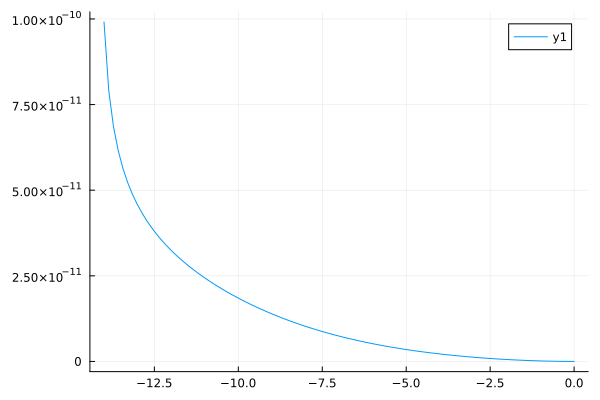

In [22]:
bs = range(-14.0,0, length=100)
plot(bs, [real(1/sqrt(DetSLId.(10.0, 30.0, -b))) for b in bs])


In [10]:
1/.sqrt.(DetSLId.(10.0, 30.0, -bs))

LoadError: ParseError:
[90m# Error @ [0;0m]8;;file:///ssd/ri47hud/Projects/3d Cosmology/codes/In[10]#1:3\[90mIn[10]:1:3[0;0m]8;;\
1/[48;2;120;70;70m.[0;0msqrt.(DetSLId.(10.0, 30.0, -bs))
[90m# ╙ ── [0;0m[91minvalid identifier[0;0m

In [12]:
[1/sqrt(DetSLId.(10.0, 30.0, -b)) for b in bs]

100-element Vector{ComplexF64}:
  1.2381201950136818e-7 - 4.240873618381233e-7im
  9.895470399466346e-11 - 4.794117854494429e-11im
   7.88605465005162e-11 - 3.728203732591912e-11im
  6.831518903992574e-11 - 3.2039010265590954e-11im
   6.12970945000902e-11 - 2.8762459023699753e-11im
  5.608703321776973e-11 - 2.6473731146052775e-11im
  5.196386896187177e-11 - 2.47657940020211e-11im
  4.856001046670111e-11 - 2.343304593047627e-11im
  4.566402640799944e-11 - 2.235829502232774e-11im
 4.3143806535846385e-11 - 2.146894469612356e-11im
  4.091166065562896e-11 - 2.0717190008422502e-11im
 3.8906641056752284e-11 - 2.0070041443473685e-11im
 3.7084827138230654e-11 - 1.9503874334624844e-11im
                        ⋮
  3.512313317091028e-13 - 5.5799247065914e-13im
 2.9219615825825186e-13 - 4.655469519772886e-13im
 2.3836873381140606e-13 - 3.807418175385206e-13im
  1.897841788220608e-13 - 3.0378801310066437e-13im
 1.4649428406953288e-13 - 2.3490718970047597e-13im
 1.0856835723128491e-13 - 1.7433242952